In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [29]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


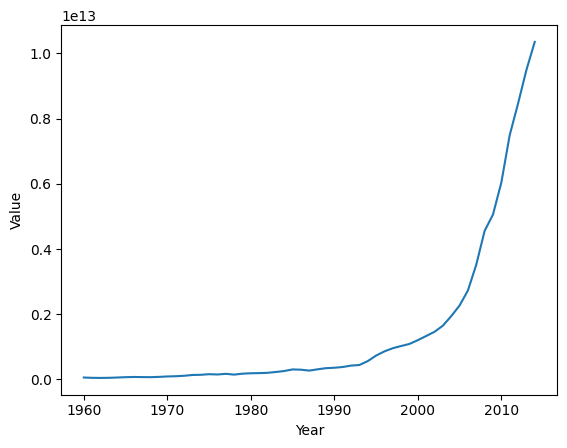

In [30]:
plt.plot(df.Year,df.Value)
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

In [31]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Value'}>]], dtype=object)

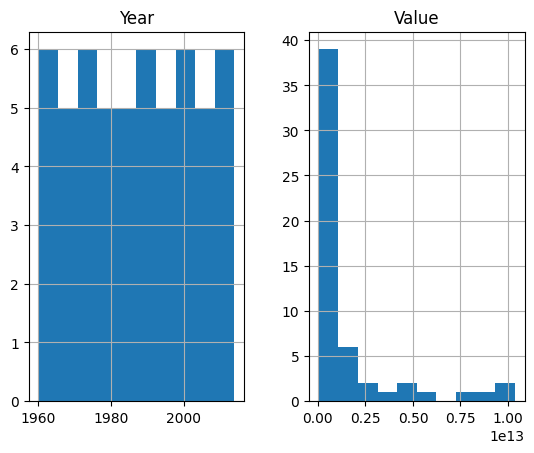

In [32]:
df.hist()

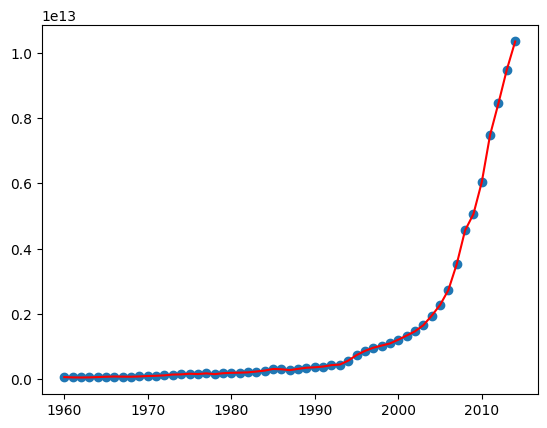

In [33]:
plt.plot(df.Year,df.Value,'-r')
plt.scatter(df.Year,df.Value)

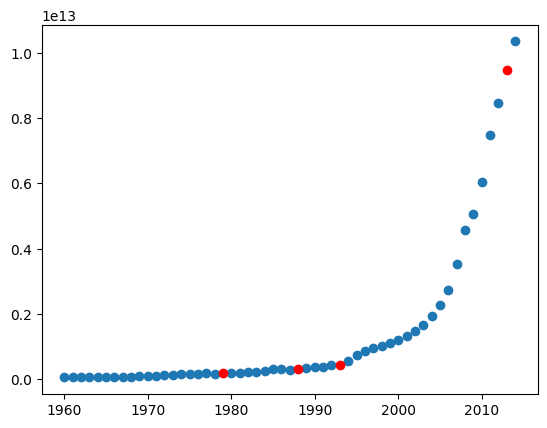

In [34]:
msk = np.random.rand(len(df)) < 0.8

train = df[msk]
test = df[~msk]

train_x = np.asanyarray(train[["Year"]])
train_y = np.asanyarray(train[["Value"]])

test_x = np.asanyarray(test[["Year"]])
test_y = np.asanyarray(test[["Value"]])

plt.scatter(train_x,train_y)
plt.scatter(test_x,test_y,color = "red")

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=5)
train_poly_x = poly.fit_transform(train_x)

In [36]:
regr = linear_model.LinearRegression()
regr.fit(train_poly_x,train_y)

LinearRegression()

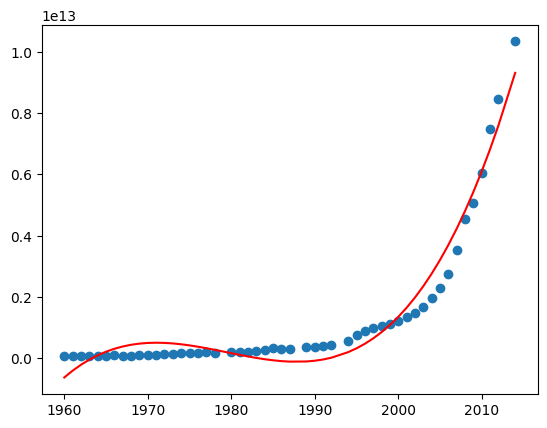

In [37]:
plt.scatter(train_x,train_y)

# xx = np.arange(train_x[0],train_x[-1],1)
xx = train_x
yy = regr.intercept_[0]+regr.coef_[0][1]*xx+regr.coef_[0][2]*np.power(xx,2)+regr.coef_[0][3]*np.power(xx,3)+regr.coef_[0][4]*np.power(xx,4)+regr.coef_[0][5]*np.power(xx,5)#+regr.coef_[0][6]*np.power(xx,6)#+regr.coef_[0][7]*np.power(xx,7)+regr.coef_[0][8]*np.power(xx,8)+regr.coef_[0][9]*np.power(xx,9)+regr.coef_[0][10]*np.power(xx,10)

plt.plot(xx,yy,'r')

In [38]:
from sklearn.metrics import r2_score

test_poly_x = poly.fit_transform(test_x)
y_ = regr.predict(test_poly_x)
round(r2_score(test_y,y_),3)

0.977